# STAT 534: Homework 1"

_Fall 2021_

_Due: Monday, September 13, 12:30 pm_

In [34]:
# Packages
library(tidyverse)
library(palmerpenguins)
library(sf)
library(mapview)
library(gghighlight)
library(lubridate)
library(janitor)
library(usmap)
library(viridis)
library(paletteer)
library(cowplot)

### 1.(Excerpted from Problem 3.8 in textbook) Using the penguins data set from the palmerpenguins package: (Hint: use na.omit(penguins) to remove cases with missing values.)depth and bill length?


* (a) Create a scatterplot of bill length mm against bill depth mm where individual species are colored and a regression line is added to each species. What do you observe about the association of bill


In [35]:
#load data
data(penguins)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


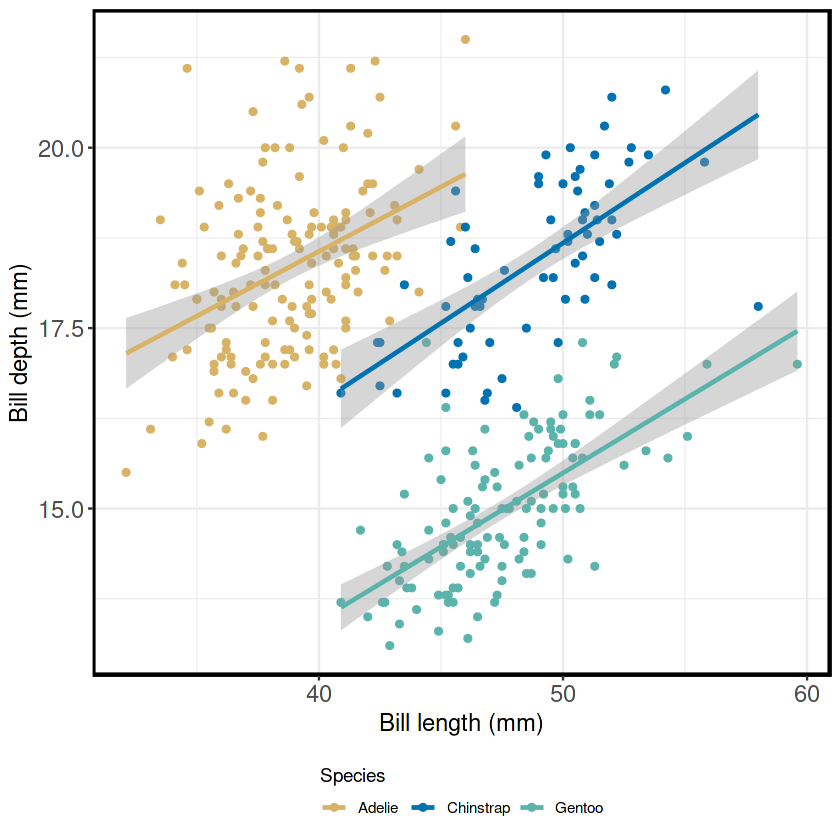

In [36]:
penguins %>%
    
    # Generate base plot and remove NA
    ggplot(aes(x = bill_length_mm , y = bill_depth_mm, color = species)) +
        geom_point() +
        geom_smooth(method = lm) +
        theme_bw() +
      
        # Edit x and y names
        xlab("Bill length (mm)") + ylab("Bill depth (mm)") +
      
        # Change color
        scale_colour_manual(values = c("#d8b365", "#0072B2", "#5ab4ac")) +
      
        # Edit the legend
        theme(axis.text.y   = element_text(size = 14),
                # Legend position and Axis size 
                legend.position = "bottom",
                axis.text.x   = element_text(size = 14),
    			axis.title.y  = element_text(size = 14),
    			axis.title.x  = element_text(size = 14),
                
                # Add borders to the plot
    			panel.border = element_rect(colour = "black", fill= NA,size = 1.3)) +
    
        # Edit legend name
        labs(colour = "Species") +  
        
        # Edit legend 
        guides(col = guide_legend(override.aes = list(fill=NA),nrow = 1,title.position = "top"))

* (b) Repeat the same scatterplot but now separate your plot into facets by sex. How would you summarize the association between bill depth and bill length?

`geom_smooth()` using formula 'y ~ x'



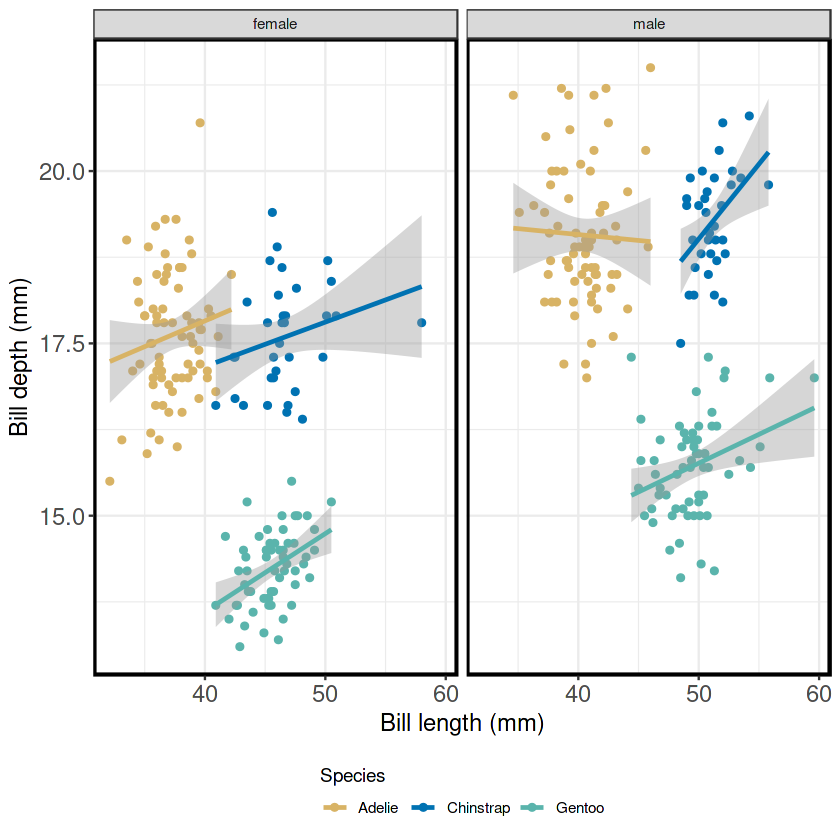

In [37]:
penguins %>%
    filter(!is.na(sex)) %>%
    
    # Generate base plot and remove NA
    ggplot(aes(x = bill_length_mm , y = bill_depth_mm, color = species)) +
      geom_point() +
      facet_wrap(~sex) +
      geom_smooth(method = lm) +
      theme_bw() +
      
      # Edit x and y names
      xlab("Bill length (mm)") + ylab("Bill depth (mm)") +
      
      # Change color
      scale_colour_manual(values = c("#d8b365", "#0072B2", "#5ab4ac")) +
      
      # Edit the legend
      theme(axis.text.y   = element_text(size = 14),
                # Legend position and Axis size 
                legend.position = "bottom",
                axis.text.x   = element_text(size = 14),
    			axis.title.y  = element_text(size = 14),
    			axis.title.x  = element_text(size = 14),
                
                # Add borders to the plot
                panel.border = element_rect(colour = "black", fill= NA,size = 1.3)) +
    
      # Edit legend name
      labs(colour = "Species") +  
      
      #Edit legend 
      guides(col = guide_legend(override.aes = list(fill=NA),nrow = 1,title.position = "top",))

### 2. Using storm data from the dplyr package:

* (a) Produce a histogram of the pressure variable. Fill your bars using the category variable.

In [38]:
# load data
data(storms)

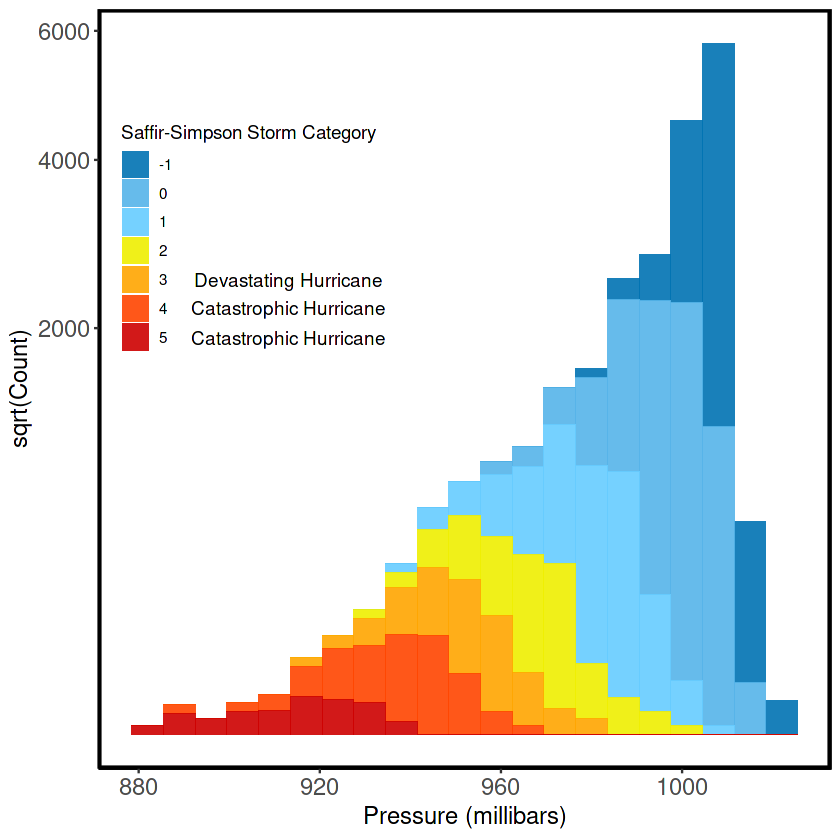

In [39]:
# Base plot
ggplot(storms, aes(pressure, fill = category)) +
    geom_histogram(binwidth = 7, alpha = 0.9) +
    scale_fill_manual(values = c("#0072B2","#56B4E9","#66ccff",'yellow2',"orange","orangered","red3" )) +
    scale_color_manual(values = c("#0072B2","#56B4E9","#66ccff",'yellow2',"orange","orangered","red3" )) +
    scale_y_sqrt() +
    theme_classic() +
    
    # Edit x and y names
    xlab("Pressure (millibars)") + ylab("sqrt(Count)") +
        
    # Change color
    # Edit the legend
    theme(axis.text.y   = element_text(size = 14),
        # Legend position and Axis size 
        legend.position = c(0.2, 0.7),
        legend.background = element_rect(fill=alpha('white', 0)),
        axis.text.x   = element_text(size = 14),
        axis.title.y  = element_text(size = 14),
        axis.title.x  = element_text(size = 14),
        
        # Add borders to the plot
        panel.border = element_rect(colour = "black", fill = NA,size = 1.3)) + 
         
    # Edit legend name
    labs(fill = "Saffir-Simpson Storm Category") +
          
    #Edit legend 
    guides(col = guide_legend(override.aes = list(fill = NA),ncol = 1,
                                    title.position = "bottom")) +
    
    annotate("text", x = 913, y = 2500, label = "Devastating Hurricane") +
    annotate("text", x = 913, y = 2200, label = "Catastrophic Hurricane") +
    annotate("text", x = 913, y = 1900, label = "Catastrophic Hurricane")

* (b) Repeat part (a) with the wind speed variable.

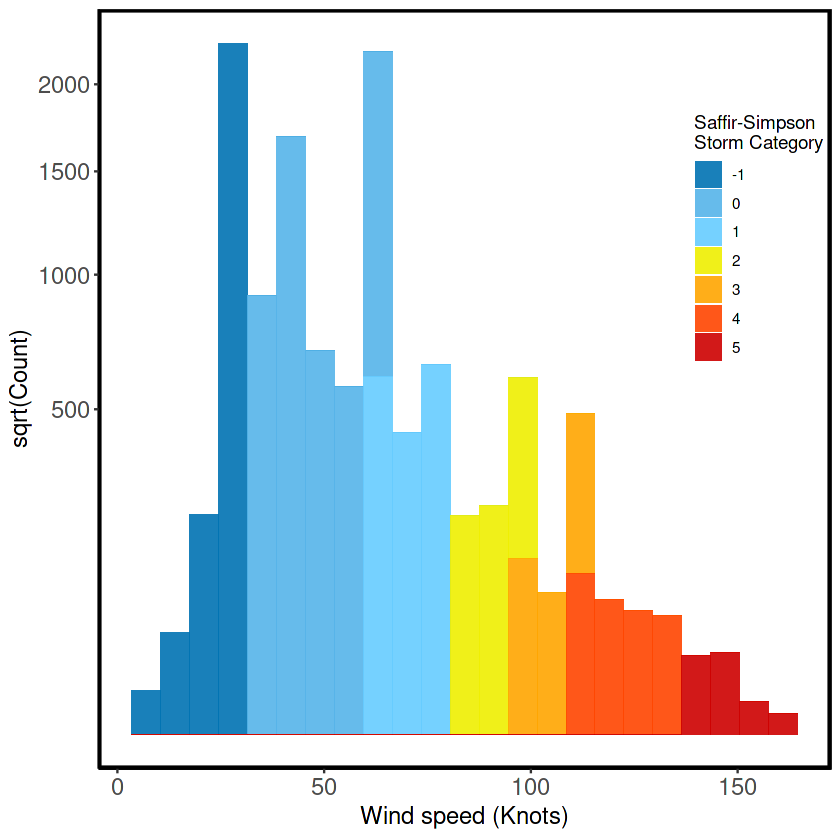

In [40]:
# Base plot
ggplot(storms, aes(wind, fill = category )) +
    geom_histogram(binwidth = 7, alpha = 0.9) +
    scale_fill_manual(values = c("#0072B2","#56B4E9","#66ccff",'yellow2',"orange","orangered","red3" )) +
    scale_color_manual(values = c("#0072B2","#56B4E9","#66ccff",'yellow2',"orange","orangered","red3" )) +
    scale_y_sqrt() +
    theme_classic() + 
    
    # Edit x and y names
    xlab("Wind speed (Knots)") + ylab("sqrt(Count)") +
        
    # Change color
    # Edit the legend
    theme(axis.text.y   = element_text(size = 14),
        # Legend position and Axis size 
        legend.position = c(0.9, 0.7),
        legend.background = element_rect(fill=alpha('white', 0)),
        axis.text.x   = element_text(size = 14),
        axis.title.y  = element_text(size = 14),
        axis.title.x  = element_text(size = 14),
        
        # Add borders to the plot
        panel.border = element_rect(colour = "black", fill = NA,size = 1.3)) + 
         
    # Edit legend name
    labs(fill = "Saffir-Simpson \nStorm Category") +
          
    #Edit legend 
    guides(col = guide_legend(override.aes = list(fill = NA),ncol = 2,title.position = "left")) 

* (c) Use geom path() to plot the path of each tropical storm in 2014. Use color to distinguish the storms from one another. Which storm in 2014 made it the furthest North?

In [41]:
# Choose 2014 storm
storms_2014 <- 
    storms %>%
      filter(year == 2014)

# Convert columns as factors
storms_2014 <- 
    storms_2014 %>% 
        mutate(name = as.factor(name),
        status = as.factor(status))

# Rename factor levels
levels(storms_2014$status) <- c("hurricane","tropical_depression","tropical_storm")


# Select projection and set coords as sf 
storms_2014_sf <- 
    storms_2014 %>% 
        st_as_sf(coords = c("long", "lat"), crs = 4326) 

In [42]:
ggplot(data = storms_2014, aes(x = lat, y = long, color = name)) + 
    geom_path() + 
    geom_point() +
    coord_flip() +
    theme_bw() + 
    
    # Edit x and y names
    xlab("Longitude") + ylab("Latitude") +A
        
    # Change color
    # Edit the legend
    theme(axis.text.y   = element_text(size = 14),
        
        # Legend position and Axis size 
        legend.position = c(0.09, 0.83),
        legend.background = element_rect(fill = alpha('white', 0)),
        axis.text.x   = element_text(size = 14),
        axis.title.y  = element_text(size = 14),DA
        axis.title.x  = element_text(size = 14),
        
        # Add borders to the plot
        panel.border = element_rect(colour = "black", fill = NA,size = 1.3)) + 
         
          # Edit legend name  
          #Edit legend 
        guides(col = guide_legend(override.aes = list(fill = NA),ncol = 1,
                title.position = "top",
                title="Storms Name")) 

ERROR: Error in parse(text = x, srcfile = src): <text>:19:9: unexpected symbol
18:         axis.title.y  = element_text(size = 14),DA
19:         axis.title.x
            ^


In [ ]:
# Create proper time values and drop some components now obsolete:
# POINT dataset
storms_2014_sf <- 
    storms_2014_sf %>% 
        mutate(time = as.POSIXct(paste(paste(year,month,day, sep = "-"), 
                                   paste(hour, ":00", sep = "")))) %>% 
        select(-month, -day, -hour)


In [ ]:
# Storm summary properties
storms_2014_nest <- 
    storms_2014_sf %>% 
        group_by(name, year) %>% nest

In [ ]:
# For each nested data.frame in the data list-column, we can combine the points 
# into a line by mapping this function
to_line <-  function(tr) st_cast(st_combine(tr), "LINESTRING") %>% 
            .[[1]]

In [ ]:
(tracks <- 
    storms_2014_nest %>% 
     pull(data) %>% 
     map(to_line) %>% 
     st_sfc(crs = 4326))

In [ ]:
# combining these storm-based geometries to the storm-based attributes
storms_2014_tr <- 
    storms_2014_nest %>% 
        select(-data) %>% 
        st_sf(geometry = tracks)

In [ ]:
palette = colorRampPalette(c("dodgerblue4","forestgreen","orangered" ,"black","red3",'yellow2',"orange"))
mapviewOptions(basemaps = "OpenTopoMap")

## Loading required package: leaflet
mapview(storms_2014_tr, zcol = "name", color = palette)

* (d) Challenge: show changes in the category variable along the paths in part (c). (Hint: group the data by names and add another aesthetic that maps category.)Remarks: The group aesthetic is by default set to the interaction of all discrete variables in the plot. This choice often partitions the data correctly, but when it does not, or when no discrete variable is used in the plot, you will need to explicitly define the grouping structure by mapping group to a variable that has a different value for each group.

In [ ]:
world_data <- 
    map_data('world') %>% 
    fortify %>% filter(lat > 0, long < -30)
  

#https://statsmaths.github.io/stat209-s19/assets/solutions/lab18-solutions.html

storms %>%
    filter(year == 2014) %>%
        ggplot(aes(long, lat)) +
            theme_bw()+
            scale_fill_manual(values = c("#0072B2","#56B4E9","#66ccff",'yellow2',"orange","orangered","red3" )) +
            scale_color_manual(values = c("#0072B2","#56B4E9","#66ccff",'yellow2',"orange","orangered","red3" )) +
            geom_map(data = world_data, map = world_data,
                      aes(x = long, y = lat, group = group, map_id = region ),
                      fill = "white", colour = "black", size = 1) +
            
            geom_path(aes(group = group), alpha = 0.7, data = world_data)+
            geom_path(aes(name  = name)) +
            geom_point(aes(color = category)) +
        
            # Edit x and y names
            xlab("Longitude") + ylab("Latitude") +
        
            # Change color
            # Edit the legend
            theme(axis.text.y   = element_text(size = 14),
                    
                    # Legend position and Axis size 
                    legend.position = c(0.30, 0.40),
                    legend.background = element_rect(fill = alpha('white', 0)),
                    axis.text.x   = element_text(size = 14),
         			axis.title.y  = element_text(size = 14),
         			axis.title.x  = element_text(size = 14),
                    
                    # Add borders to the plot
                    panel.border = element_rect(colour = "black", fill = NA,size = 1.3)) + 
         
            # Edit legend name
            # Edit legend 
            guides(col = guide_legend(override.aes = list(fill = NA),ncol = 1,
                                    title.position = "top",
                                    title="Storms Category")) 

### 3. COVID-19 vignette

* (a) Use data in us cases.txt (data source: New York Times [repository](https://github.com/nytimes/covid-19-data) of COVID-19 data) to reproduce Figure (a) with geom col() and geom smooth(span = 0.1, method = ”loess”, se = F) .

![Drag Racing](figure_a.png)

In [ ]:
# load data
uscovid_cases <- read.table(file = "data_hw1/us_cases-1.txt", header = T)

uscovid_cases <-  
    uscovid_cases %>% 
    mutate(date = ymd(date),
    state = as.factor(state))

In [ ]:
va_covid_cases <-  
    uscovid_cases %>% 
        filter(state == "Virginia")

ggplot(data = va_covid_cases,aes(x = date, y = daily_cases)) +
    geom_col() +
    scale_x_date(date_breaks = "25.5 week", date_labels = ('%Y-%m')) +
    geom_smooth(span = 0.1, method = 'loess', se = F)+
    ggtitle("COVID-19 cases of Virginia")+
    theme(plot.title = element_text(size = 10)) +
    ylab("Daily new cases")

* (b) Challenge: reproduce Figure (b) with gghighlight() function in the gghighlight package.

![Figure B](figure_b.png)


In [ ]:
ggplot(data = uscovid_cases,aes(x = date, y = daily_cases, color = state)) +

  geom_smooth(span = .09, method = 'loess', se = F)  +
  gghighlight::gghighlight(state %in% c("Virginia","California","New York","Texas")) +
  scale_x_date(limits = as.Date(c("2019-12-31", "2021-09-31"))) +
  ylab("Daily new cases")

* (c) When tracking a disease, the rate of growth is particularly important, and is proportional to the logarithm of the case count. Reproduce the figure below with scale_y _log10(labels =  scales::comma).

In [ ]:
filter(uscovid_cases,state %in% c("Virginia","California","New York","Texas")) %>%
    ggplot(aes(x = date, y = cases, color = state)) +
      geom_line() +
      scale_y_log10(labels = scales::comma)

* (d) Use data in vaccine.txt (data source: Johns Hopkins repository of COVID-19 data) to create an informative graphic that demonstrates the vaccination rollout across the US at the current stage. You may follow examples at Johns Hopkins coronavirus resource center or create your own plot.

In [ ]:
vaccine <- read.table(file = "data_hw1/vaccine.txt", header = T) %>% 
    clean_names()

vaccine_ratio <- 
    vaccine %>% 
        mutate(ratio = people_fully_vaccinated/population)  

In [ ]:
plot_1 <- ggplot(data = vaccine_ratio, aes(x = reorder(state,ratio), y = ratio, color = population )) +
            geom_point() +
            coord_flip() +
            scale_color_viridis() +
            scale_y_continuous(labels = scales::comma) +
            xlab(NULL) +
            #guides(col = guide_legend(title = "Population (Millions)")) 

            ylab("People fully vaccinated / State Population") +
            labs(color='State Population') 
            #guides(fill = guide_legend(title="New Legend Title"))

plot_2 <-  plot_usmap(data = vaccine_ratio, values = "ratio", color = NULL) + 
            paletteer::scale_fill_paletteer_c("viridis::viridis",label = scales::comma) +
            theme(legend.position = "right") +
            guides(fill = guide_legend( title = "People fully vaccinated / State Population "))
 

In [ ]:
plot_grid(plot_1, plot_2,ncol = 1)